In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import csv
from ipywidgets import widgets

In [3]:
# Load data from netlogo's behaviorspace "spreadsheet" output
def loadBehaviorspace(filename):
    lines = []
    with open(filename, 'rb') as csvfile:
         reader = csv.reader(csvfile, delimiter=',', quotechar='"')
         for row in reader:
             lines.append(row)

    metadata = lines[0:5]
    
    _data = lines[6:]
    _data = np.array(lines[6:], dtype=object).T
    for i in range(1, len(_data)):
        for j in range(1, len(_data[i])):
            try:
                _data[i][j] = float(_data[i][j])
            except:
                continue
    data = {}
    for col in _data:
        data[col[0]] = np.array(col[1:], dtype=float)
            
    return (metadata, data)

In [4]:
metadata,data = loadBehaviorspace("./behaviorspace_data/mutation_adaptive-agent-2_1_1_m_pools.csv")

In [193]:
# Todo: refactor the other notebooks to use this better param-extracting code

# Returns arrays of initial parameters, indexed by param name
def get_run_params(param_names):
    if type(param_names) is str: param_names = [param_names]
    first_step_mask = [step == 1 for step in data['[step]']]
    return {param: np.extract(first_step_mask, data[param]) for param in param_names}

# Returns arrays of initial parameters, indexed by param name, and 
# This will mask by run, not by step.
def mask_params(param_limits):
    if '[run number]' not in param_limits:
        param_limits['[run number]'] = False
    
    firsts = get_run_params(param_limits.keys())
    mask = np.ones(len(firsts['[run number]']), dtype=bool)
    
    for param_name in param_limits:
        param_run_values = firsts[param_name]
        bounds = param_limits[param_name]

        if type(bounds) not in [int, long, float, tuple]: continue
        
        if type(bounds) is not tuple:
            bounds = (bounds, bounds)
        
        for i in range(len(param_run_values)):
            val = param_run_values[i]
            mask[i] = mask[i] and val >= bounds[0] and val <= bounds[1]

    return {param: np.extract(mask, firsts[param]) for param in firsts.keys()}


masked_params_by_run = mask_params({
    '[run number]':       True,
    'percent-to-replace': True,
    'N':                  True,
    'mutation-magnitude': (0.2, 0.6),
    'tau':                True,
    'p':                  True,
    'num-variants':       True,
})

masked_params_by_run

{'N': array([50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
        50., 50., 50., 50., 50., 50.]),
 '[run number]': array([21., 22., 23., 24., 25., 26., 27., 28., 30., 29., 31., 32., 33.,
        34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46.,
        47., 48., 49., 50., 51., 52., 53., 54., 55., 57., 56., 58., 59.,
        60., 61., 62., 64., 65., 63.]),
 'mutation-magnitude': array([0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.25, 0.25, 0.25, 0.25, 0.25, 0.3 ,
        0.3 , 0.3 , 0.3 , 0.3 , 0.35, 0.35, 0.35, 0.35, 0.35, 0.4 , 0.4 ,
        0.4 , 0.4 , 0.4 , 0.45, 0.45, 0.45, 0.45, 0.45, 0.5 , 0.5 , 0.5 ,
        0.5 , 0.5 , 0.55, 0.55, 0.55, 0.55, 0.55, 0.6 , 0.6 , 0.6 , 0.6 ,
        0.6 ]),
 'num-variants': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.,

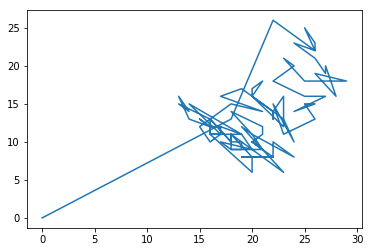

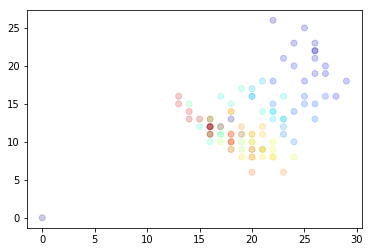

In [248]:
# Runs satisfying certain parameters

runs = mask_params({
    '[run number]':       True,
    'mutation-magnitude': (0.15, 0.2)
})['[run number]']

runs = [13]
run_mask = [r in runs for r in data['[run number]']]

X = np.extract(run_mask, data['get-for-pool recent-agent-history 1'])
Y = np.extract(run_mask, data['get-for-pool recent-agent-history 2'])

step = np.extract(run_mask, data['[step]'])

plt.plot(X, Y, linestyle='-') # connect the dots
plt.show()
plt.scatter(X, Y, color=plt.cm.jet(plt.Normalize()(step)), alpha=0.2)
plt.show()

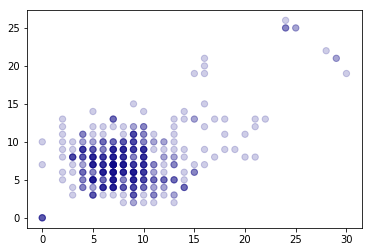

In [173]:
# All runs

#mm_bounds = (0.5, 0.5)
#mm_mask = [m >= mm_bounds[0] and m <= mm_bounds[1] for m in data['mutation-magnitude']]

mm = 0.6
mm_mask = [mm == m for m in data['mutation-magnitude']]

mutation_magnitude = np.extract(mm_mask, data['mutation-magnitude'])
X = np.extract(mm_mask, data['get-for-pool recent-agent-history 1'])
Y = np.extract(mm_mask, data['get-for-pool recent-agent-history 2'])

plt.scatter(X, Y, color=plt.cm.plasma(plt.Normalize()(mutation_magnitude)), alpha=0.2, s=40)
plt.show()